# Manipuler des images avec Python: partie 2

## Du pixel aux images - 32M7138

*Printemps 2024 - Université de Genève*

*Adrien Jeanrenaud (adrien.jeanrenaud@unige.ch)*

<div class="alert alert-block alert-info">
<b>Manipulations des images partie 2</b> : continuons la manipulation d'images en quantité, en extrayant automatiquement ou manuellement les informations des images :
</div>

## **Plan du cours**

> **Extraire des informations manuellement**
> * Définir les variables de base
> * Que cherche-t-on ?
> * Créer un tableur
> * Reprendre un tableur en route
> * Ajouter nos informations manuellement

> **Extraire des inforamtions automatiquement**
> * Sur Colab


In [1]:
# importer les librairies nécessaires

import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from time import sleep
import pandas as pd
plt.rcParams['figure.figsize'] = [12, 7]

## 1. Extraire des informations manuellement

### Définir les variables de base

En premier lieu, il faut définir quelques variables

> * le dossier d'images
> * le nom du csv et les extensions des images

In [2]:
# le dossier à explorer
folder_to_roam = 'VanGogh_portrait'

os.path.isdir(folder_to_roam)

True

In [3]:
# le nom du csv à écrire 
csv_to_write = 'VanGogh_portrait.csv'

# pour n'avoir que les images
valid_extensions = ['.jpg', '.png', '.jpeg']

# separateur dans le csv
separator = ','

### Que cherche-t-on ?

Quelle(s) question(s) pose-t-on à notre groupe d'image ?

In [4]:
# l'information à noter
field_to_write1 = 'personne'

# la seconde information à noter
#field_to_write2 = ' '

### Créer un tableur

Il nous faut créer un tableur vide pour enregistrer nos informations. On utilise les variables pour définir les colones

In [5]:
index = [] 
#keys = [str(field_to_write1), str(field_to_write2)] #si plusieurs informations
keys = [str(field_to_write1)]
iterator = list(os.walk(folder_to_roam))
for root, dirs, files in iterator:
    iterator_bis = files
    for file in  iterator_bis:
        if file.endswith(tuple(valid_extensions)):
            index.append(file)

pd.DataFrame(columns=keys, index=index).to_csv(csv_to_write)

In [11]:
# voir notre csv

csv = pd.read_csv(csv_to_write, index_col = [0] )
csv

personne
3455430818368260423_1926-01-01.jpg        NaN
3985589603700027241_1926-01-01.jpg        NaN
2221750040905946975_1937-01-01.jpg        NaN
16699326264690741888_1926-01-01.jpg       NaN
4341553720444709626_1922-01-01.jpg        NaN
15594523917536520026_1937-01-01.jpg       NaN
17898751244050429049_1947-01-01.jpg       NaN
6950481323937729753_1921-01-01.jpg        NaN
17081519575713646347_1932-01-01.jpg       NaN
8854971534209556026_1927-01-01.jpg        NaN
910170732834132017_1937-01-01.jpg         NaN
8193669398584550900_1912-01-01.jpg        NaN
13104323162462611673_1966-01-01.jpg       NaN
2122596887146135925_1937-01-01.jpg        NaN
13274513606033906053_1947-01-01.jpg       NaN
5920090843904859827_1926-01-01.jpg        NaN
14042283349472807806_1943-02-01.jpg       NaN
881873418366666785_1930-01-01.jpg         NaN
10534432595828564949_1932-01-01.jpg       NaN
12723693742842148905_1912-01-01.jpg       NaN
8177834103126173014_1927-01-01.jpg        NaN
6016089789330544112_1926-01-01.jpg        NaN
4203279557831407815_1947-01-01.jpg        NaN
2727921280430073225_1966-01-01.jpg        NaN
2166384085171623245_1937-01-01.jpg        NaN
5605650274174973682_1921-01-01.jpg        NaN
14575878468824219134_1938-01-01.jpg       NaN
1966546017689930770_1921-01-01.jpg        NaN
17198757066664151924_1947-01-01.jpg       NaN
14691511290093773310_1923-07-15.jpg       NaN
3781903444428630705_1928-01-01.jpg        NaN
15220243292037390101_1929-01-01.jpg       NaN
16762741219501322896_1947-01-01.jpg       NaN
10557942634866141177_1947-01-01.jpg       NaN
12092641017301758010_1927-01-01.jpg       NaN
169838889892014754_1947-01-01.jpg         NaN
12198474087498669377_1912-01-01.jpg       NaN
8861007808267359747_1924-02-01.jpg        NaN
14270947076500235876_1928-01-01.jpg       NaN
17002727225545309646_1914-10-08.jpg       NaN
16586066764935691791_1928-01-01.jpg       NaN

### Reprendre un tableur en route

On peut se retrouver devant le cas de figure où on reprend notre CSV après avoir déjà extrait quelques informations. Si vous ajoutez des images à votre dossier ou si vous voulez extraire d'autres informations, il faudra recommencer.

In [14]:
todo = [] # files
toa = [] # index
iterator = list(os.walk(folder_to_roam))
df = pd.read_csv(csv_to_write, index_col = [0] )
for root, dirs, files in iterator:
    for file in files:
        if file.endswith(tuple(valid_extensions)):
            for i in df.index:
                if i == file:
                    a = np.where(df.index == i)[0][0]
                    if type(df.iloc[int(a)][0]) != str:
                        todo.append(file)
                        toa.append(a)
                    else:
                        continue
    print("Entrées à faire : " , len(todo))

Entrées à faire :  41


### Ajouter nos informations manuellement

Maintenant on peut extraire les informations. La boucle vous demande toute les 10 images si vous voulez continuer. En disant non, vous vous engagez à recommencer à la cellule du dessus.

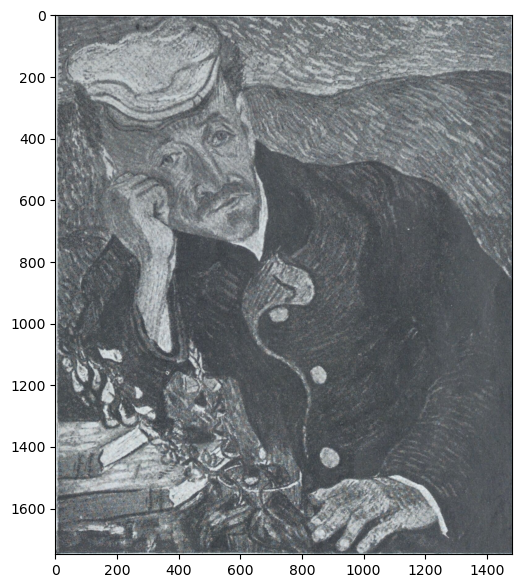

Image name :  3455430818368260423_1926-01-01.jpg


personne :  y


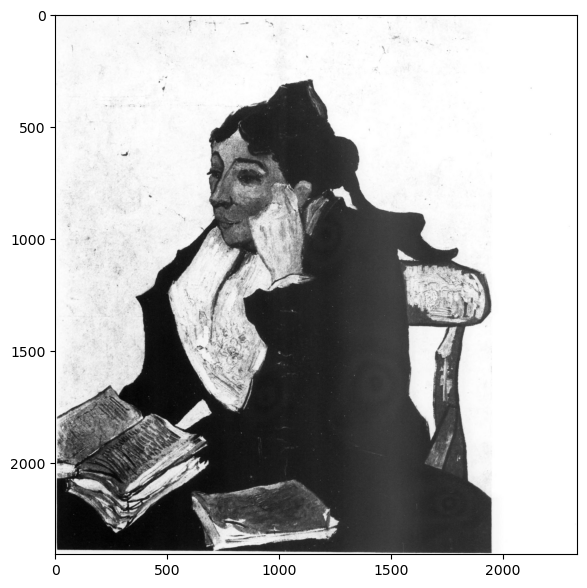

Image name :  3985589603700027241_1926-01-01.jpg


personne :  y


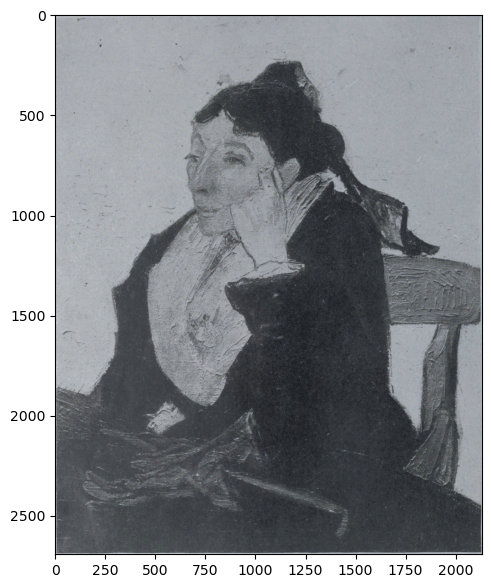

Image name :  2221750040905946975_1937-01-01.jpg


personne :  y


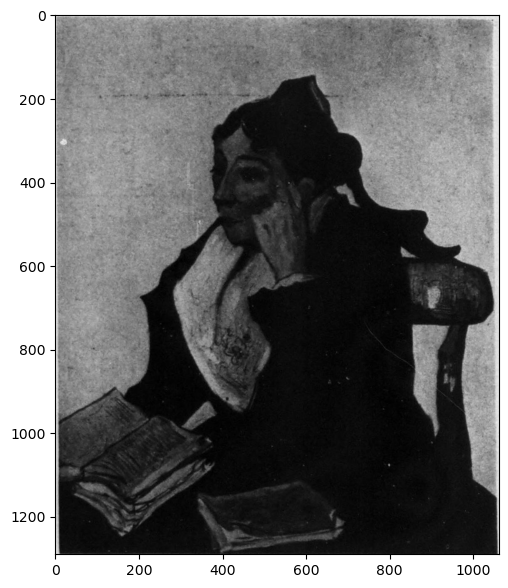

Image name :  16699326264690741888_1926-01-01.jpg


personne :  y


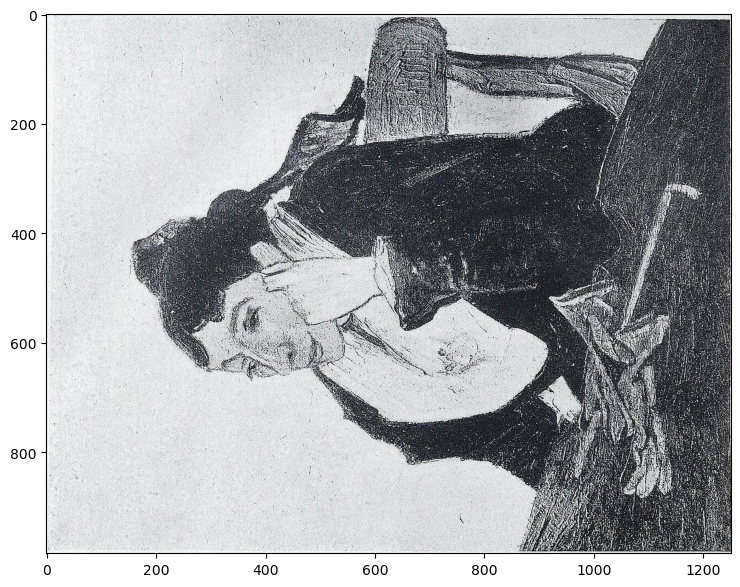

Image name :  4341553720444709626_1922-01-01.jpg


personne :  y


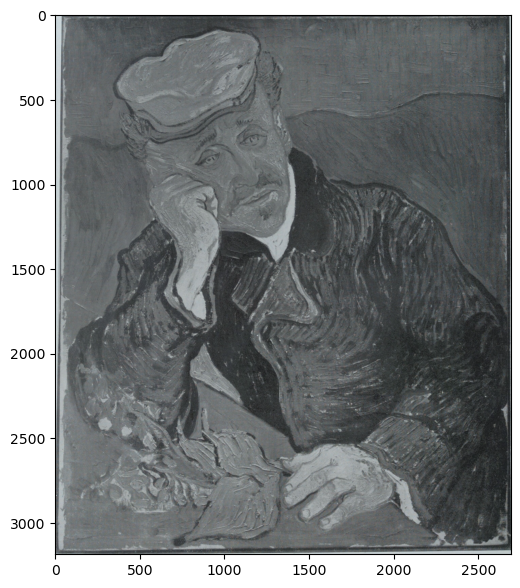

Image name :  15594523917536520026_1937-01-01.jpg


personne :  y


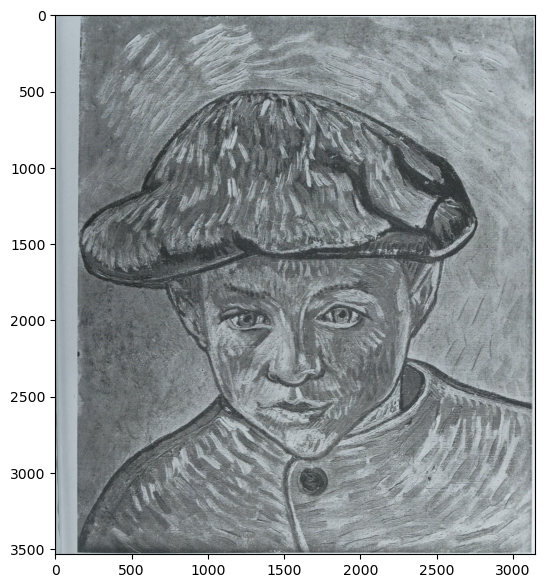

Image name :  17898751244050429049_1947-01-01.jpg


personne :  y


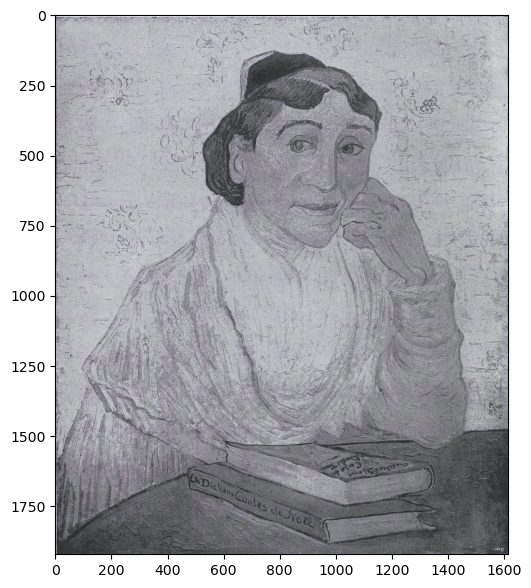

Image name :  6950481323937729753_1921-01-01.jpg


personne :  y


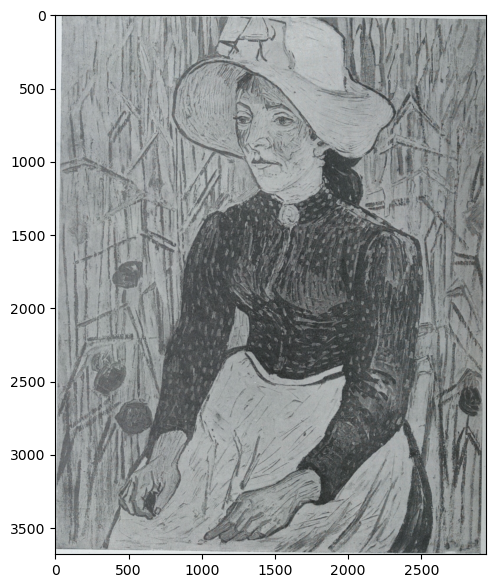

Image name :  17081519575713646347_1932-01-01.jpg


personne :  y


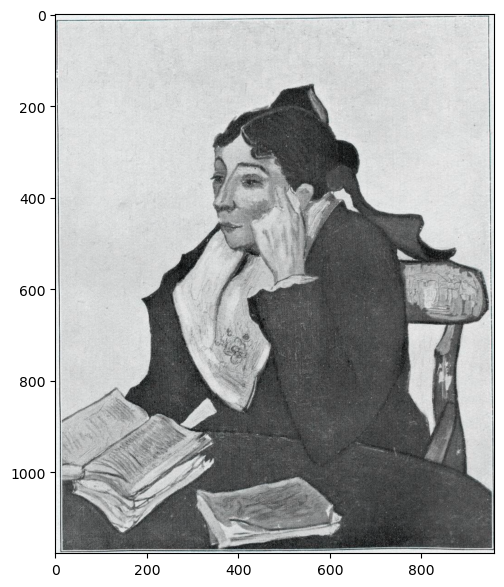

Image name :  8854971534209556026_1927-01-01.jpg


personne :  y
Continue ? [y]/n n


In [18]:
df = pd.read_csv(csv_to_write, index_col = [0] )
count = 0
for j, k in zip(todo, toa):
    img = cv2.imread(folder_to_roam+"/"+j)
    plt.imshow(img)
    plt.show()
    sleep(0.1)
    print("Image name : ", j)
    champ1 = input(str(field_to_write1) + " : ")
    df.loc[df.index[int(k)], field_to_write1] = champ1
    #champ2 = input(str(field_to_write2) + " : ")
    #df.loc[df.index[int(k)], field_to_write2] = champ2
    df.to_csv(csv_to_write)
    count += 1
    if count % 10 == 0 :
        content = input('Continue ? [y]/n')
        if content == 'n':
            break

## 2. **Extraire des inforamtions automatiquement**

Sur Colab : https://colab.research.google.com/drive/1RSgJHgB94KUbvulBrgT9SLpmQzuGcC5k?usp=share_link